**This notebook helps to test the class trainer for the model 2**

In [1]:
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import set_config
set_config(display="diagram")


In [4]:
from BatteryProject.ModelTwo import trainer
from BatteryProject.ModelTwo.loss import root_mean_squared_error 

features = {
    'disc_capa' : 'summary_discharge_capacity.csv',
    'dis_ener' : 'summary_discharge_energy.csv',
    'temp_avg' : 'summary_temperature_average.csv',
    'char_capa' : 'summary_charge_capacity.csv',
}

2022-11-03 12:19:56.760568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 12:19:56.760649: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-03 12:19:58.868173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-03 12:19:58.868422: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-03 12:19:58.868496: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-OT3CO2AQ): /proc/driver/nvidia/version does not exist
2022-11-03 12:19:58.870360: I tensorflow/core/platform/cpu_fe

In [5]:
trainer = trainer.Trainer(features, deep = 40, offset = 20)
trainer

In [6]:
trainer.get_data()

In [7]:
print(f"X_train.shape: {trainer.X_train.shape} y_train.shape: {trainer.y_train.shape}")

X_train.shape: (2960, 40, 5) y_train.shape: (2960,)


In [8]:
trainer.scaling()
trainer.get_baseline()
print("baseline:", trainer.baseline)

baseline: 323.6759605729077


In [9]:
trainer.set_pipeline()

In [10]:
trainer.run(epochs = 20)

Epoch 1/20
93/93 [==============================] - 4s 26ms/step - loss: 495914.7812 - root_mean_squared_error: 704.2122 - val_loss: 365050.9062 - val_root_mean_squared_error: 604.1945
Epoch 2/20
93/93 [==============================] - 2s 22ms/step - loss: 495027.5000 - root_mean_squared_error: 703.5819 - val_loss: 364134.5000 - val_root_mean_squared_error: 603.4356
Epoch 3/20
93/93 [==============================] - 2s 22ms/step - loss: 493755.7188 - root_mean_squared_error: 702.6776 - val_loss: 362906.7188 - val_root_mean_squared_error: 602.4174
Epoch 4/20
93/93 [==============================] - 2s 22ms/step - loss: 492172.5312 - root_mean_squared_error: 701.5501 - val_loss: 361469.1562 - val_root_mean_squared_error: 601.2230
Epoch 5/20
93/93 [==============================] - 2s 23ms/step - loss: 490344.6562 - root_mean_squared_error: 700.2462 - val_loss: 359774.5938 - val_root_mean_squared_error: 599.8121
Epoch 6/20
93/93 [==============================] - 2s 23ms/step - loss: 48

29/29 [==============================] - 0s 5ms/step - loss: 259269.7812 - root_mean_squared_error: 509.1854
Mean absolute error: {'eval_train': 638.7843017578125, 'eval_val': 538.0796508789062, 'eval_test': 509.1853942871094}


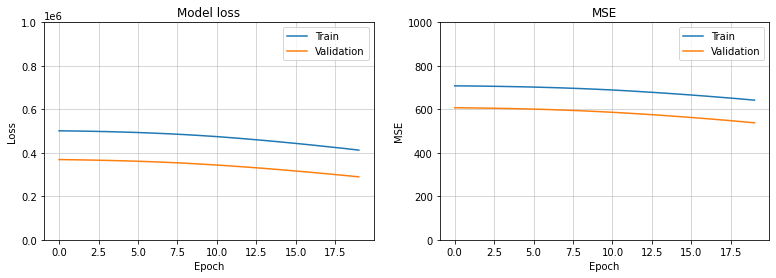

In [15]:
res = trainer.eval()
res
print(f'Mean absolute error: {res}')
trainer.plot_mse();

In [17]:
trainer.raw_data.keys()

dict_keys(['disc_capa', 'dis_ener', 'temp_avg', 'char_capa'])

In [18]:
trainer.split_indexes

{'train': array([ 37, 100,  81,  70, 103,  86,  89,  41,  83, 115,  99,  15,   6,
         60,  12,  19,  20,  26,  64,  65, 107,  24,  57,  85,  13,  93,
         71,  44,  68,  77,  63,  43,  21,  30,  76,  40,  58,  27,  22,
         69,  16,   0,  88,  61,   7,  42,  72, 111,  87,  25,  38,  34,
         23,  53,  36,  39, 106,  55,  33,  14,  18,  95, 118, 114,  50,
        117,  84,  66,  29,  32,  51]),
 'val': array([ 52, 104,  49, 108, 101,   3,  79,  73,   5,   9,  92,  91,  11,
          1,   4,   8, 109,  10,  35,  45,  47,  28, 110,  75]),
 'test': array([ 94,  54,  59, 116,  74,  46,  31,  80,  48,  97,  96,  98,   2,
         90, 112,  56, 105, 102,  67,  62,  78,  17,  82, 113])}

In [31]:
dict_indexes = trainer.split_indexes
for key in dict_indexes.keys():
    dict_indexes[key] = list(set(dict_indexes[key]))

dict_indexes

{'train': [0,
  6,
  7,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  32,
  33,
  34,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  50,
  51,
  53,
  55,
  57,
  58,
  60,
  61,
  63,
  64,
  65,
  66,
  68,
  69,
  70,
  71,
  72,
  76,
  77,
  81,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  93,
  95,
  99,
  100,
  103,
  106,
  107,
  111,
  114,
  115,
  117,
  118],
 'val': [1,
  3,
  4,
  5,
  8,
  9,
  10,
  11,
  28,
  35,
  45,
  47,
  49,
  52,
  73,
  75,
  79,
  91,
  92,
  101,
  104,
  108,
  109,
  110],
 'test': [2,
  17,
  31,
  46,
  48,
  54,
  56,
  59,
  62,
  67,
  74,
  78,
  80,
  82,
  90,
  94,
  96,
  97,
  98,
  102,
  105,
  112,
  113,
  116]}